## Best Class to take to learn Programming

In [1]:
#import libraries
import requests
from bs4 import BeautifulSoup
import pandas  as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
url = 'https://www.classcentral.com/subject/programming-and-software-development'

def get_pages(url, number_results):
    pages = []
    pages.append(url)
    total_results = 0
    page_no = 2 #50 results per page 
    while total_results < number_results:
        primary_url = url
        url_extra = '?page='
        mod_url = primary_url + url_extra + str(page_no)
        pages.append(mod_url)
        page_no += 1
        total_results+=50
    return pages

In [3]:
pages = get_pages(url, 1200)
pages

['https://www.classcentral.com/subject/programming-and-software-development',
 'https://www.classcentral.com/subject/programming-and-software-development?page=2',
 'https://www.classcentral.com/subject/programming-and-software-development?page=3',
 'https://www.classcentral.com/subject/programming-and-software-development?page=4',
 'https://www.classcentral.com/subject/programming-and-software-development?page=5',
 'https://www.classcentral.com/subject/programming-and-software-development?page=6',
 'https://www.classcentral.com/subject/programming-and-software-development?page=7',
 'https://www.classcentral.com/subject/programming-and-software-development?page=8',
 'https://www.classcentral.com/subject/programming-and-software-development?page=9',
 'https://www.classcentral.com/subject/programming-and-software-development?page=10',
 'https://www.classcentral.com/subject/programming-and-software-development?page=11',
 'https://www.classcentral.com/subject/programming-and-software-develo

In [4]:
#init data lists
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []

## Defining Functions

In [5]:
def get_reviews(string):
    index = string.find('Reviews')
    review = string[index - 10: index + 10]
    reviews.append(review.strip())

In [6]:
def append_institute(institute):
    if institute is not None:
        institutes.append(institute.text.strip())
    else:
        institutes.append(-1)

In [7]:
def append_provider(provider):
    if provider is not None:
        providers.append(provider.text.strip())
    else:
        providers.append(-1)

In [8]:
def append_date(date):
    if date is not None:
        dates.append(date.text.strip())
    else:
        dates.append('Self Paced')

In [9]:
def append_rating(rating):
    if rating is not None:
        ratings.append(rating.text.strip())
    else:
        ratings.append(-1)

In [10]:
def append_name(name):
    names.append(name)

## Web Scraping

In [11]:
def get_data(pages):
    for page in pages:
        r = requests.get(page)
        soup = BeautifulSoup(r.content, 'html.parser')
        rows = soup.select('tbody tr')

        for row in rows:
            #name
            name = row.select_one('span',{ 'class': 'text-1 line-tight'}).text.strip()
            append_name(name)

            #institute
            institute = row.find('a', {'class': 'color-charcoal small-down-text-2 text-3'})
            append_institute(institute)

            #provider
            provider = row.find('span', {'class': 'hidden medium-up-inline-block'})
            append_provider(provider)

            #date
            date = row.find('td', {'itemprop': 'startDate'})
            append_date(date)

            #reviews
            rev = row.find('span', {'class': 'large-down-hidden block line-tight text-4 color-gray'})
            string = str(rev)
            get_reviews(string)

            #rating
            rating = row.find('span', attrs = {'class': 'xlarge-up-hidden color-charcoal text-center'})
            append_rating(rating)
            
    df = pd.DataFrame({'name': names,
                         'institute': institutes,
                         'provider': providers,
                         'date': dates,
                         'review': reviews,
                         'rating': ratings})
    return df

In [12]:
programming_df = get_data(pages)

In [13]:
programming_df

,name,institute,provider,date,review,rating
0,AD,Columbia Engineering Executive Education,-1,Self Paced,None,
1,Programming for Everybody (Getting Started wit...,University of Michigan,Coursera,"24th Aug, 2020",20651 Reviews,4.9
2,Python Data Structures,University of Michigan,Coursera,"17th Aug, 2020",7935 Reviews,4.9
3,An Introduction to Interactive Programming in ...,Rice University,Coursera,"17th Aug, 2020",3242 Reviews,4.9
4,Using Python to Access Web Data,University of Michigan,Coursera,"24th Aug, 2020",2887 Reviews,4.7
...,...,...,...,...,...,...
1395,程序设计与算法（大学先修课）,Peking University,Coursera,"8th Oct, 2015",None,-1
1396,Firebase Essentials For Android,Google,Udacity,"1st Dec, 2015",None,-1
1397,Introduction to Databases,Stanford University,Coursera,Self Paced,31 Reviews,4.7
1398,Mon ordinateur dans le nuage,Certificat informatique et internet,France Université Numerique,"1st Feb, 2016",None,-1


## Clean DataFrame

In [14]:
def clean(df):
    #df.drop('Unnamed: 0', axis=1, inplace=True) #only need if reading from csv.
    df = df[df['name'] != 'AD']
    df = df[df['rating'] != -1]
    df.loc[df['institute'] == '-1', 'institute'] = None
    df.drop_duplicates(inplace = True)
    return df

In [15]:
programming_df = clean(programming_df)
programming_df

,name,institute,provider,date,review,rating
1,Programming for Everybody (Getting Started wit...,University of Michigan,Coursera,"24th Aug, 2020",20651 Reviews,4.9
2,Python Data Structures,University of Michigan,Coursera,"17th Aug, 2020",7935 Reviews,4.9
3,An Introduction to Interactive Programming in ...,Rice University,Coursera,"17th Aug, 2020",3242 Reviews,4.9
4,Using Python to Access Web Data,University of Michigan,Coursera,"24th Aug, 2020",2887 Reviews,4.7
6,Using Databases with Python,University of Michigan,Coursera,"24th Aug, 2020",2311 Reviews,4.7
...,...,...,...,...,...,...
1378,Developing Scalable Apps in Python,Google,Udacity,"30th Apr, 2015",1 Reviews,4.0
1379,Android Development for Beginners,Google,Udacity,"11th May, 2015",23 Reviews,4.3
1385,Interactive Computer Graphics with WebGL,University of New Mexico,Coursera,"29th Jun, 2015",2 Reviews,4.5
1388,JDK 8 Massive Open and Online Course: Lambdas ...,Oracle,Independent,"14th Jul, 2015",6 Reviews,4.8


In [16]:
#We need to get rid of rows with less than 5 reviews as low reviews and high rating can be misleading.
def get_rating(df):
    highest_rated = df.sort_values('rating', ascending = False)
    reviews_int = highest_rated['review'].map(lambda x: x.rstrip('Reviews')).astype(int)
    highest_rated['review'] = pd.DataFrame(reviews_int)
    highest_rated = highest_rated[highest_rated['review'] >= 5]
    return highest_rated

In [17]:
programming_rate = get_rating(programming_df)
programming_rate

,name,institute,provider,date,review,rating
38,"HTML, CSS, and Javascript for Web Developers",Johns Hopkins University,Coursera,"24th Aug, 2020",17,5.0
2,Python Data Structures,University of Michigan,Coursera,"17th Aug, 2020",7935,4.9
1,Programming for Everybody (Getting Started wit...,University of Michigan,Coursera,"24th Aug, 2020",20651,4.9
27,Computing in Python II: Control Structures,Georgia Institute of Technology,edX,Self Paced,36,4.9
3,An Introduction to Interactive Programming in ...,Rice University,Coursera,"17th Aug, 2020",3242,4.9
...,...,...,...,...,...,...
991,Intermediate C++,Microsoft,edX,Self Paced,5,2.2
653,Intro to Relational Databases,-1,Udacity,Self Paced,7,2.1
974,Advanced C++,Microsoft,edX,Self Paced,7,1.3
87,Introduction To Swift Programming,University of Toronto,Coursera,"17th Aug, 2020",7,1.3


## Data Retrieval 

Now that we have some functions set up to streamline the process we can webscrape data from different domains on the same website.

In [18]:
#Functions: get_pages(url, # results), run webscraper: get_data(pages), clean(df), get_rating(df)
dataframes = []
dataframes.append(programming_rate)

In [19]:
#python courses
pages = get_pages('https://www.classcentral.com/subject/python', 200)
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []
python_df = get_data(pages)
python_df = clean(python_df)
python_rate = get_rating(python_df)
dataframes.append(python_rate)

In [20]:
#machine learning courses
pages = get_pages('https://www.classcentral.com/subject/machine-learning', 250)
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []
ml_df = get_data(pages)
ml_df = clean(ml_df)
ml_rate = get_rating(ml_df)
dataframes.append(ml_rate)

In [21]:
#data science courses
pages = get_pages('https://www.classcentral.com/subject/data-science', 600)
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []
ds_df = get_data(pages)
ds_df = clean(ds_df)
ds_rate = get_rating(ds_df)
dataframes.append(ds_rate)

In [22]:
#computer science courses
pages = get_pages('https://www.classcentral.com/subject/cs', 1800)
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []
cs_df = get_data(pages)
cs_df = clean(cs_df)
cs_rate = get_rating(cs_df)
dataframes.append(cs_rate)

In [23]:
#stats and probability courses
pages = get_pages('https://www.classcentral.com/subject/statistics', 150)
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []
stats_df = get_data(pages)
stats_df = clean(stats_df)
stats_rate = get_rating(stats_df)
dataframes.append(stats_rate)

In [24]:
#artificial intelligence courses
pages = get_pages('https://www.classcentral.com/subject/ai', 300)
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []
ai_df = get_data(pages)
ai_df = clean(ai_df)
ai_rate = get_rating(ai_df)
dataframes.append(ai_rate)

In [25]:
#data analysis courses
pages = get_pages('https://www.classcentral.com/subject/data-analysis', 150)
names = []
institutes = []
providers = []
dates = []
reviews = []
ratings = []
da_df = get_data(pages)
da_df = clean(da_df)
da_rate = get_rating(da_df)
dataframes.append(da_rate)

Now that we have some data to work with we can create some visuals. 

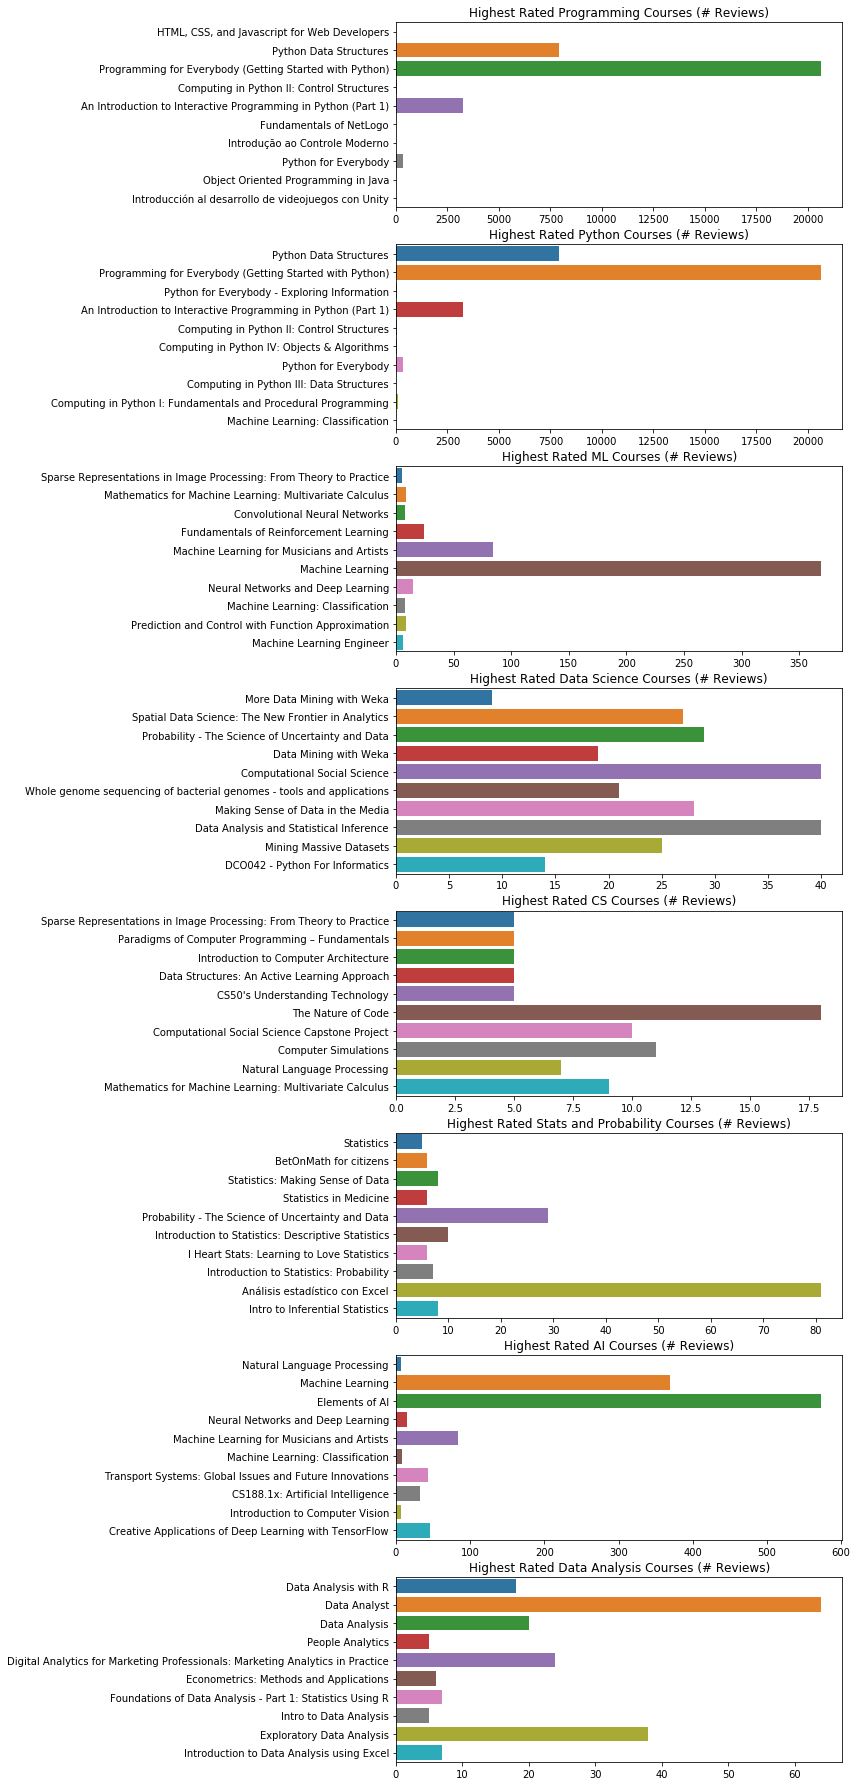

In [26]:
fig, ax = plt.subplots(8,1, figsize = (8,32))

i = 0
j = 0

titles = ['Highest Rated Programming Courses (# Reviews)',
          'Highest Rated Python Courses (# Reviews)',
         'Highest Rated ML Courses (# Reviews)',
         'Highest Rated Data Science Courses (# Reviews)',
         'Highest Rated CS Courses (# Reviews)',
         'Highest Rated Stats and Probability Courses (# Reviews)',
         'Highest Rated AI Courses (# Reviews)',
         'Highest Rated Data Analysis Courses (# Reviews)']

for df in dataframes:
    sns.barplot(ax = ax[i], y = 'name', x = 'review', data = df.head(10))
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(titles[i])
    i+=1

In [27]:
programming_rate['provider'].value_counts()

Coursera                        56
Udacity                         33
edX                             32
Independent                      2
Open Education by Blackboard     1
Complexity Explorer              1
Kadenze                          1
openHPI                          1
openSAP                          1
Swayam                           1
Name: provider, dtype: int64

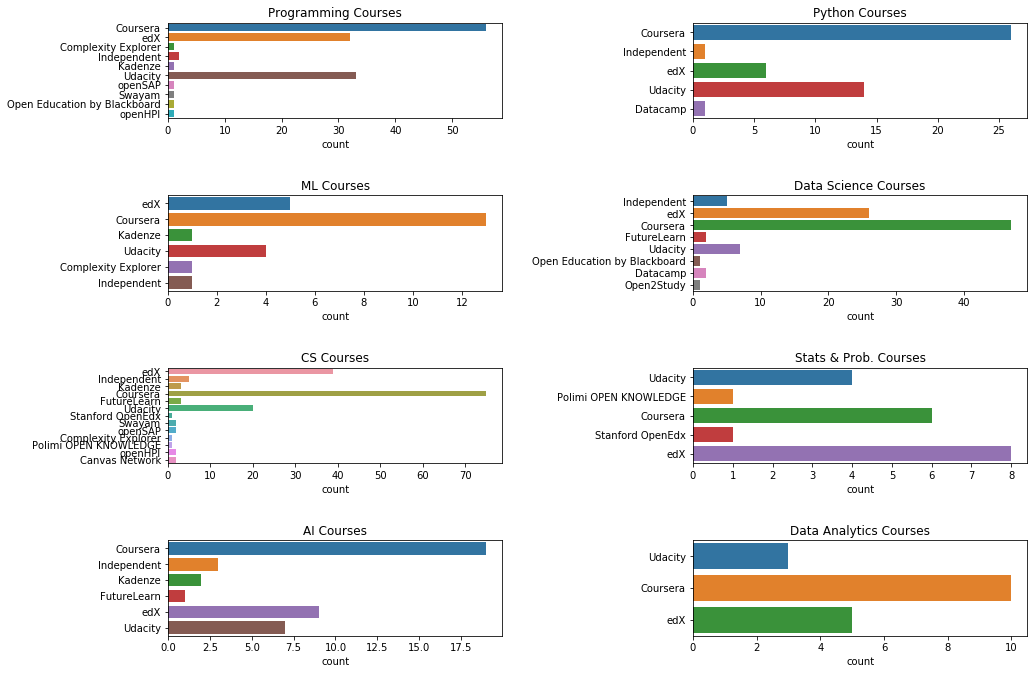

In [28]:
fig, ax = plt.subplots(4,2, figsize = (15,10))

i = 0
j = 0
k = 0

titles = ['Programming Courses',
          'Python Courses',
         'ML Courses',
         'Data Science Courses',
         'CS Courses',
         'Stats & Prob. Courses',
         'AI Courses',
         'Data Analytics Courses']

for df in dataframes:
    sns.countplot(ax = ax[j, i], y = df['provider'])
    ax[j, i].set_title(titles[k])
    ax[j, i].set_ylabel('')
    i+=1
    k+=1
    if i > 1:
        i = 0
        j+= 1
    
fig.tight_layout(pad=3.0)  

It looks like Courseera, edX and Udacity have the most courses available. Generally these providers also had the most reviews with the highest ratings. Therefore, if looking to take any type of programming course in a specific domain, you should take it through these 3 providers. 

In [29]:
programming_rate.head(5)

,name,institute,provider,date,review,rating
38,"HTML, CSS, and Javascript for Web Developers",Johns Hopkins University,Coursera,"24th Aug, 2020",17,5.0
2,Python Data Structures,University of Michigan,Coursera,"17th Aug, 2020",7935,4.9
1,Programming for Everybody (Getting Started wit...,University of Michigan,Coursera,"24th Aug, 2020",20651,4.9
27,Computing in Python II: Control Structures,Georgia Institute of Technology,edX,Self Paced,36,4.9
3,An Introduction to Interactive Programming in ...,Rice University,Coursera,"17th Aug, 2020",3242,4.9


In [30]:
python_rate.head(5)

,name,institute,provider,date,review,rating
2,Python Data Structures,University of Michigan,Coursera,"17th Aug, 2020",7935,4.9
1,Programming for Everybody (Getting Started wit...,University of Michigan,Coursera,"24th Aug, 2020",20651,4.9
16,Python for Everybody - Exploring Information,-1,Independent,Self Paced,38,4.9
3,An Introduction to Interactive Programming in ...,Rice University,Coursera,"17th Aug, 2020",3242,4.9
18,Computing in Python II: Control Structures,Georgia Institute of Technology,edX,Self Paced,36,4.9


In [31]:
ml_rate.head(5)

,name,institute,provider,date,review,rating
286,Sparse Representations in Image Processing: Fr...,Technion - Israel Institute of Technology,edX,Self Paced,5,5.0
14,Mathematics for Machine Learning: Multivariate...,Imperial College London,Coursera,"17th Aug, 2020",9,4.9
17,Convolutional Neural Networks,deeplearning.ai,Coursera,"17th Aug, 2020",8,4.9
6,Fundamentals of Reinforcement Learning,University of Alberta,Coursera,"24th Aug, 2020",24,4.9
2,Machine Learning for Musicians and Artists,"Goldsmiths, University of London",Kadenze,Self Paced,84,4.8


In [32]:
ds_rate.head(5)

,name,institute,provider,date,review,rating
643,More Data Mining with Weka,University of Waikato,Independent,"26th Feb, 2016",9,4.9
30,Spatial Data Science: The New Frontier in Anal...,Esri,Independent,"28th Oct, 2020",27,4.9
18,Probability - The Science of Uncertainty and Data,Massachusetts Institute of Technology,edX,"1st Sep, 2020",29,4.9
644,Data Mining with Weka,University of Waikato,Independent,"26th Feb, 2016",19,4.8
11,Computational Social Science,"University of California, Davis",Coursera,Self Paced,40,4.8


In [33]:
cs_rate.head(5)

,name,institute,provider,date,review,rating
1338,Sparse Representations in Image Processing: Fr...,Technion - Israel Institute of Technology,edX,Self Paced,5,5.0
1106,Paradigms of Computer Programming – Fundamentals,Université catholique de Louvain,edX,Self Paced,5,5.0
836,Introduction to Computer Architecture,Carnegie Mellon University,Independent,Self Paced,5,5.0
1004,Data Structures: An Active Learning Approach,"University of California, San Diego",edX,Self Paced,5,5.0
996,CS50's Understanding Technology,Harvard University,edX,Self Paced,5,5.0


In [34]:
stats_rate.head(5)

,name,institute,provider,date,review,rating
103,Statistics,San Jose State University,Udacity,Self Paced,5,5.0
155,BetOnMath for citizens,Politecnico di Milano,Polimi OPEN KNOWLEDGE,"16th Mar, 2020",6,5.0
162,Statistics: Making Sense of Data,University of Toronto,Coursera,"1st Apr, 2013",8,5.0
179,Statistics in Medicine,Stanford University,Stanford OpenEdx,"28th Feb, 2016",6,5.0
6,Probability - The Science of Uncertainty and Data,Massachusetts Institute of Technology,edX,"1st Sep, 2020",29,4.9


In [35]:
ai_rate.head(5)

,name,institute,provider,date,review,rating
363,Natural Language Processing,Stanford University,Coursera,Self Paced,7,5.0
2,Machine Learning,Stanford University,Coursera,"17th Aug, 2020",369,4.8
1,Elements of AI,University of Helsinki,Independent,Self Paced,573,4.8
13,Neural Networks and Deep Learning,deeplearning.ai,Coursera,"24th Aug, 2020",15,4.8
3,Machine Learning for Musicians and Artists,"Goldsmiths, University of London",Kadenze,Self Paced,84,4.8


In [36]:
da_rate.head(5)

,name,institute,provider,date,review,rating
7,Data Analysis with R,Facebook,Udacity,Self Paced,18,4.6
1,Data Analyst,Kaggle,Udacity,Self Paced,64,4.5
221,Data Analysis,Johns Hopkins University,Coursera,"28th Oct, 2013",20,4.2
46,People Analytics,University of Pennsylvania,Coursera,"24th Aug, 2020",5,4.2
6,Digital Analytics for Marketing Professionals:...,University of Illinois at Urbana-Champaign,Coursera,"17th Aug, 2020",24,4.2


Sometimes it may be better to opt for a higher reviewed course where the rating margin is small. More reviews means that more people have taken the course and so that could be the safer bet.

In [37]:
#dump data from scrape into csv
programming_df.to_csv(r'D:\Data Science\Best Programming Course\prgm_scrape.csv')
python_df.to_csv(r'D:\Data Science\Best Programming Course\python_scrape.csv')
ml_df.to_csv(r'D:\Data Science\Best Programming Course\ml_scrape.csv')
ds_df.to_csv(r'D:\Data Science\Best Programming Course\ds_scrape.csv')
cs_df.to_csv(r'D:\Data Science\Best Programming Course\cs_scrape.csv')
stats_df.to_csv(r'D:\Data Science\Best Programming Course\stats_scrape.csv')
ai_df.to_csv(r'D:\Data Science\Best Programming Course\ai_scrape.csv')
da_df.to_csv(r'D:\Data Science\Best Programming Course\da_scrape.csv')